In [6]:
import tensorflow as tf

In [7]:
from tensorflow.examples.tutorials.mnist import input_data

In [17]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [9]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x10d384438>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x1c20b52a20>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x1c20b52358>)

In [18]:
mnist.train.images.shape, mnist.train.labels.shape

((55000, 784), (55000, 10))

In [19]:
mnist.train.labels[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.])

In [20]:
mnist.test.images.shape, mnist.test.labels.shape

((10000, 784), (10000, 10))

In [13]:
mnist.validation.images.shape

(5000, 784)

In [21]:
import numpy as np
from matplotlib import pyplot as plt

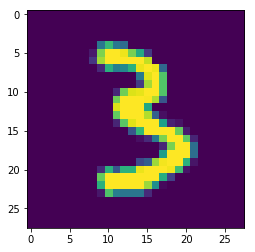

In [24]:
first_image = mnist.train.images[412]
first_image = np.array(first_image, dtype='float')
first_image = first_image.reshape((28,28))
plt.imshow(first_image)
plt.show()

In [34]:
with tf.Session() as sess:
    print(tf.random_normal([784, 256]).eval())

[[ 1.13322186  0.45387599 -1.82626998 ...,  2.03059793 -0.91097021
  -0.62730253]
 [-1.35407901 -0.04800731 -0.05031865 ..., -0.17762068  1.01906836
   0.82904285]
 [ 0.26951063  0.46058875 -2.12265921 ...,  0.18055628 -0.25939092
  -0.24231285]
 ..., 
 [-1.57803559  0.61281323  1.16583836 ..., -0.59082645 -0.54805982
  -1.01212168]
 [-0.33802646 -0.30995217 -0.46456161 ...,  1.11870122  1.02748537
   0.32503417]
 [-0.31240442 -0.2335557   0.26861891 ..., -2.71879625  1.07709408
  -3.01729894]]


In [35]:
# weights & biases
n_input = 784
n_hidden_1 = 256
n_hidden_2 = 256
n_classes = 10

weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

biases = {
    'h1': tf.Variable(tf.random_normal([n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

In [36]:
def forward_propagation(x, weights, biases):
    in_layer1 = tf.add(tf.matmul(x, weights['h1']), biases['h1'])
    out_layer1 = tf.nn.relu(in_layer1)
    
    in_layer2 = tf.add(tf.matmul(out_layer1, weights['h2']), biases['h2'])
    out_layer2 = tf.nn.relu(in_layer2)
    
    output = tf.add(tf.matmul(out_layer2, weights['out']), biases['out'])
    return output

In [55]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder(tf.int32, [None, n_classes])

In [70]:
pred = forward_propagation(x, weights, biases)
predictions = tf.argmax(pred, 1)
true_labels = tf.argmax(y, 1)
correct_predictions = tf.equal(predictions, true_labels)

In [77]:
predictions_eval,labels, correct_pred  = sess.run([predictions, true_labels, correct_predictions], feed_dict={x:mnist.train.images, y:mnist.train.labels})
predictions_eval,labels,correct_pred

(array([4, 9, 9, ..., 0, 0, 8]),
 array([7, 3, 4, ..., 5, 6, 8]),
 array([False, False, False, ..., False, False,  True], dtype=bool))

In [78]:
correct_pred.sum()

5617